# Example 4.4

Compute the total and effective stress at point A. Plot the vertical total and effective stresses with the pore pressure profile in the same graph.

## Data:

Soil profile.

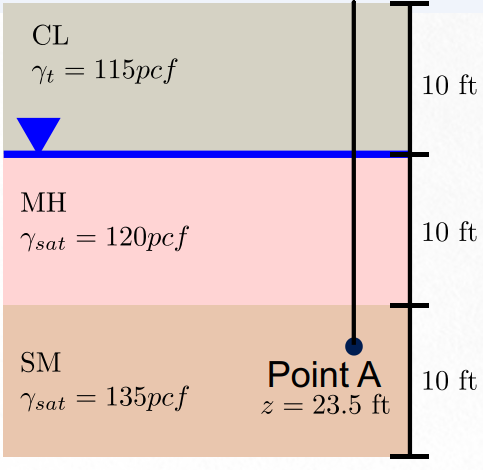

## Principles:

$\sigma_{v,i}=\sum_{i=1}^n \gamma_i h_i $

$u_i=\gamma_w h_{w,i}$

$\sigma'_{v,i}=\sigma_{v,i}-u_i$

In [1]:
import pandas as pd
import numpy as np
import Soilved as slv
import matplotlib.pyplot as plt

In [2]:
# I created a function that calculates K0 stresses and needs borehole data to calculate:

#First define the "borehole data" in the following fashion:

Soil_profile={'z_b': [10, 20, 30], 't': [10, 10, 10], 'gamma_t':[115, 120, 135], 'K0':[1,1,1]} #creates a data structure always do it in this fashion if you want to use my function

#'z_b':         depth from the surface of the bottom of each layer
#'t':           thickness of each layer
#'gamma_t':     Total or sat unit weight of each layer
#'K0':          Coefficient of lateral earth pressure at-rest for each layer

#All this data must be entered as lists e.g. [dat1, dat2, ..... dati, ... datn] if there ate n layers

#the following step is to transform the data structure into a pandas dataframe

Soil_profile=pd.DataFrame(Soil_profile) #creates pandas dataframe

Soil_profile #shows data table with headers

,z_b,t,gamma_t,K0
0,10,10,115,1
1,20,10,120,1
2,30,10,135,1


In [3]:
z_pointA=23.5 # depth to point A
z_w=10 #depth to water table
sigma_t, sigma_eff, u, _, _=slv.GetK0Stresses(z_pointA, z_w, Soil_profile, gamma_w=62.4) #calculates pressure at depth z with water table depth z_w
print("sigma_t= %1.2f psf" %sigma_t)
print("u= %1.2f psf" %u)
print("sigma_eff= %1.2f psf" %sigma_eff)

sigma_t= 2822.50 psf
u= 842.40 psf
sigma_eff= 1980.10 psf


In [4]:
# for the plot I will create a list of depths  from 0 to 30 ft
z=np.linspace(0,30, 4)

# Now I will initialize variables to store the total, effective stresses, and pore pressures

SIGMA_t=np.zeros(len(z)) #total stress
SIGMA_eff=np.zeros(len(z)) #effective stress
U=np.zeros(len(z)) #pore pressure

#Now I can loop te depths and fill the data
for i in range(len(z)):
    SIGMA_t[i], SIGMA_eff[i], U[i], _, _=slv.GetK0Stresses(z[i], z_w, Soil_profile, gamma_w=62.4) # calculates stresses

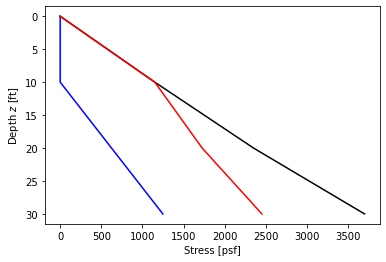

In [5]:
# Now I can create the plot

plt.plot(SIGMA_t, z, 'k') #total stress in black
plt.plot(U, z, 'b') #pore pressure in blue
plt.plot(SIGMA_eff, z, 'r') #total stress in red

#formatting the plot
plt.xlabel(r'Stress [psf]')
plt.ylabel(r'Depth $z$ [ft]')
plt.gca().invert_yaxis() #inverts y axis

# Example 4.5

Compute the total and effective horizontal stress at point A. Plot the vertical and horizontal total and effective stresses with the pore pressure profile in the same graph.

## Data:

Soil profile
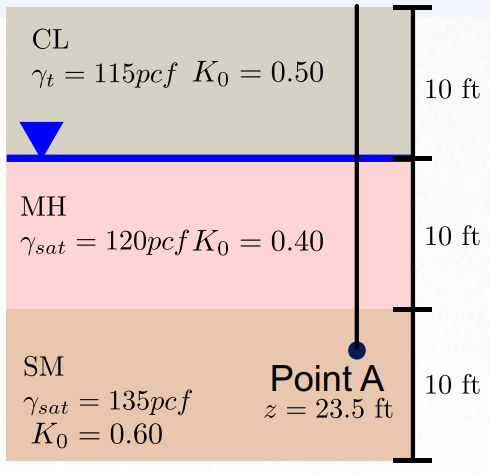

## Principles:

$K_0=\cfrac{\sigma'_h}{\sigma'_v}$

$\sigma_{h,i}=\sigma'_{h,i}+u_{i}$

In [6]:
# I can use the same function for the horizontal stresses

Soil_profile={'z_b': [10, 20, 30], 't': [10, 10, 10], 'gamma_t':[115, 120, 135], 'K0':[0.5,0.4,0.6]} #creates a data structure always do it in this fashion if you want to use my function

Soil_profile=pd.DataFrame(Soil_profile) #creates pandas dataframe

Soil_profile #shows data table with headers

,z_b,t,gamma_t,K0
0,10,10,115,0.5
1,20,10,120,0.4
2,30,10,135,0.6


In [7]:
z_pointA=23.5 # depth to point A
z_w=10 #depth to water table
_, _, u, sigmah_eff, sigmah_t=slv.GetK0Stresses(z_pointA, z_w, Soil_profile, gamma_w=62.4) #calculates pressure at depth z with water table depth z_w
print("u= %1.2f psf" %u)
print("sigmah_eff= %1.2f psf" %sigmah_eff)
print("sigmah_t= %1.2f psf" %sigmah_t)

u= 842.40 psf
sigmah_eff= 1188.06 psf
sigmah_t= 2030.46 psf


In [8]:
# for the plot I will create a list of depths  from 0 to 30 ft
z=np.linspace(0,30, 200) # I need more points to have a better definition of the profile

# Now I will initialize variables to store the total, effective stresses, and pore pressures

SIGMA_t=np.zeros(len(z)) #total stress
SIGMAH_t=np.zeros(len(z)) #total horizontal stress
SIGMA_eff=np.zeros(len(z)) #effective stress
SIGMAH_eff=np.zeros(len(z)) #effective horizontal stress
U=np.zeros(len(z)) #pore pressure

#Now I can loop te depths and fill the data
for i in range(len(z)):
    SIGMA_t[i], SIGMA_eff[i], U[i], SIGMAH_eff[i], SIGMAH_t[i]=slv.GetK0Stresses(z[i], z_w, Soil_profile, gamma_w=62.4) # calculates stresses

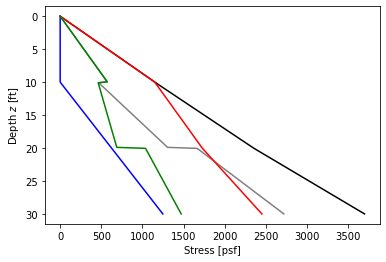

In [9]:
# Now I can create the plot

plt.plot(SIGMA_t, z, 'k') #total stress in black
plt.plot(SIGMAH_t, z, 'grey') #total horizontal stress in black
plt.plot(U, z, 'b') #pore pressure in blue
plt.plot(SIGMA_eff, z, 'r') #effective stress in red
plt.plot(SIGMAH_eff, z, 'g') #effective horizontal stress in green

#formatting the plot
plt.xlabel(r'Stress [psf]')
plt.ylabel(r'Depth $z$ [ft]')
plt.gca().invert_yaxis() #inverts y axis

# Example 4.6

What is the effect of lowering the GWT 3 m on the effective vertical stresses for the soil proyle in Example 4.4. What if the GWT is at the surface?

## Data:

Soil profile

$z_w=13$ m lower water table

$z_w=0$ m, rising water table

## Principles:

$\sigma_{v,i}=\sum_{i=1}^n \gamma_i h_i $

$u_i=\gamma_w h_{w,i}$

$\sigma'_{v,i}=\sigma_{v,i}-u_i$

In [10]:
# The soil profile is the same as before.
# we'll check the results on point A
z_pointA=23.5 # depth to point A
z_w=13 #depth to water table
_, _, u, sigmah_eff, sigmah_t=slv.GetK0Stresses(z_pointA, z_w, Soil_profile, gamma_w=62.4) #calculates pressure at depth z with water table depth z_w
print("u= %1.2f psf" %u)
print("sigmah_eff= %1.2f psf" %sigmah_eff)
print("sigmah_t= %1.2f psf" %sigmah_t)

u= 655.20 psf
sigmah_eff= 1300.38 psf
sigmah_t= 1955.58 psf


In [11]:
z_pointA=23.5 # depth to point A
z_w=0 #depth to water table
_, _, u, sigmah_eff, sigmah_t=slv.GetK0Stresses(z_pointA, z_w, Soil_profile, gamma_w=62.4) #calculates pressure at depth z with water table depth z_w
print("u= %1.2f psf" %u)
print("sigmah_eff= %1.2f psf" %sigmah_eff)
print("sigmah_t= %1.2f psf" %sigmah_t)

u= 1466.40 psf
sigmah_eff= 813.66 psf
sigmah_t= 2280.06 psf
